In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

## Client Data

In [5]:
client_data_df = pd.read_csv("Datasets/client_data.csv")
client_data_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,...,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
8,f53a254b1115634330c12c7fdbf7958a,usilxuppasemubllopkaafesmlibmsdf,2962,0,0,2011-09-23,2016-09-23,2011-09-23,2015-09-25,444.38,...,f,0.00,12.82,12.82,1,42.59,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,26064,0,2188,2010-05-04,2016-05-04,2015-04-29,2015-05-05,2738.10,...,f,219.59,33.42,33.42,1,329.60,6,lxidpiddsbxsbosboudacockeimpuepw,31.500,0


In [8]:
client_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [10]:
client_data_df.nunique()

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698


In [14]:
client_data_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [96]:
client_data_df.groupby("churn").mean(numeric_only=True)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
churn,,,,,,,,,,,,,,,,,
0,167867.266550,30121.497308,17046.352089,1858.473333,1402.487601,0.938197,62.126588,0.137371,0.050019,43.108310,152.964184,23.929863,23.926979,1.295822,185.057407,5.037006,18.000339
1,78862.478506,9235.411557,7205.239605,1962.861938,1374.441860,1.231853,72.010937,0.136470,0.054873,43.332143,151.139331,30.468682,30.468682,1.260042,228.361938,4.633545,19.387827


In [ ]:
clients_churn = client_data_df.groupby(["churn"], as_index=False)["churn"].count()

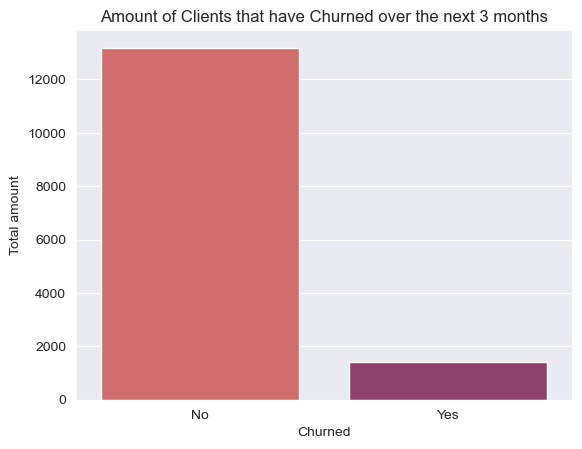

In [89]:
ax = sns.barplot(x="index", y="churn", data=clients_churn.reset_index(), palette="flare")
title = ax.set_title("Amount of Clients that have Churned over the next 3 months")
labels = ax.set(xlabel="Churned", ylabel="Total amount")
ticks = ax.set_xticklabels(["No", "Yes"])

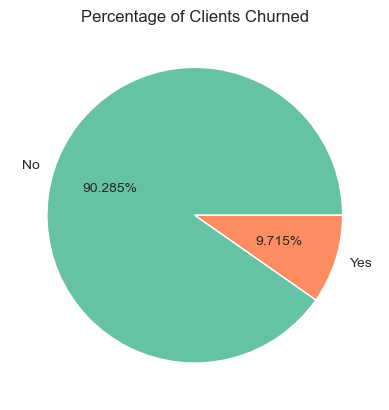

In [128]:
churn_percentage = round((clients_churn / clients_churn.sum()) * 100, 3)
plot = plt.pie(clients_churn["churn"], labels=["No", "Yes"], colors=sns.color_palette("Set2"), autopct='%.3f%%')
title = plt.title("Percentage of Clients Churned")

In [239]:
client_contract_df = client_data_df[["date_activ", "date_end", "date_modif_prod", "date_renewal", "churn"]].copy()
client_contract_df["date_activ"] = pd.to_datetime(client_contract_df["date_activ"])
client_contract_df["date_end"] = pd.to_datetime(client_contract_df["date_end"])
client_contract_df["date_modif_prod"] = pd.to_datetime(client_contract_df["date_modif_prod"])
client_contract_df["contract_length"] = (round((client_contract_df["date_end"] - client_contract_df["date_activ"]) / np.timedelta64(1, "Y"))).astype(int)
client_contract_df["last_modif_from_activ"] = (round((client_contract_df["date_modif_prod"] - client_contract_df["date_activ"]) / np.timedelta64(1, "M"))).astype(int)
client_contract_df.head()

,date_activ,date_end,date_modif_prod,date_renewal,churn,contract_length,last_modif_from_activ
0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,1,3,29
1,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0,7,0
2,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0,6,0
3,2010-03-30,2016-03-30,2010-03-30,2015-03-31,0,6,0
4,2010-01-13,2016-03-07,2010-01-13,2015-03-09,0,6,0


In [246]:
client_contract_df.groupby("contract_length")[.count()

,date_activ,date_end,date_modif_prod,date_renewal,churn,last_modif_from_activ
contract_length,,,,,,
2,1,1,1,1,1,1
3,1056,1056,1056,1056,1056,1056
4,3585,3585,3585,3585,3585,3585
5,2924,2924,2924,2924,2924,2924
6,3429,3429,3429,3429,3429,3429
7,2956,2956,2956,2956,2956,2956
8,122,122,122,122,122,122
9,75,75,75,75,75,75
10,88,88,88,88,88,88


ValueError: Length of Int64Index vectors must match length of `data` when both are used, but `data` has length 14606 and the vector passed to `x` has length 12.

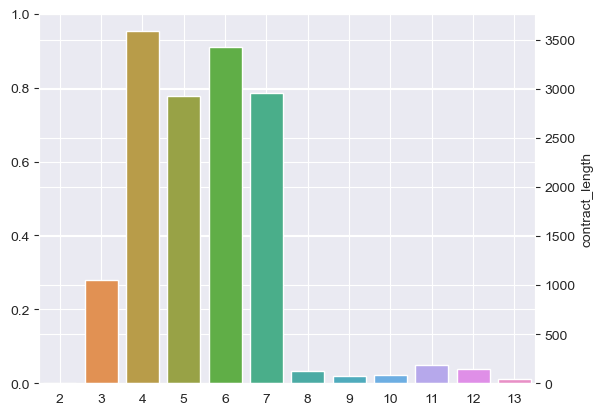

In [242]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.barplot(x=client_contract_df.contract_length.value_counts().index, y=client_contract_df["contract_length"].value_counts(), data=client_contract_df, ax=ax2)
#ax.twinx()
sns.lineplot(x=client_contract_df.contract_length.value_counts().index, y=client_contract_df["churn"].value_counts(), data=client_contract_df, ax=ax1)
#ax.set_xticks(range(30))
#ax.set(ylim=(0, 200))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

## Price Data

In [6]:
price_data_df = pd.read_csv("Datasets/price_data.csv")
price_data_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.0,0.0,44.266930,0.0,0.0
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.0,0.0,44.444710,0.0,0.0
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.0,0.0,44.444710,0.0,0.0
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.0,0.0,44.444710,0.0,0.0
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.0,0.0,44.444710,0.0,0.0


In [9]:
price_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [11]:
price_data_df.nunique()

id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
dtype: int64

In [15]:
price_data_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [131]:
ax = sns.boxplot(x="price_date", y=["price_off_peak_fix", "price_peak_fix", "price_mid_peak_fix"], data=price_data_df)
ax.tick_params(axis='x', labelrotation=45)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
ax = sns.boxplot(x='categories', y='oxygen', hue='target', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)